In [87]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
full_data=pd.merge(mouse_df,clinical_df,on="Mouse ID",how="left")
full_data["Tumor Volume (mm3)"] = round(full_data["Tumor Volume (mm3)"],1)


# Display the data table for preview
full_data.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0
1,f234,Stelasyn,5,47.3,0
2,f234,Stelasyn,10,47.9,0
3,f234,Stelasyn,15,48.7,1
4,f234,Stelasyn,20,51.1,2


## Tumor Response to Treatment

In [88]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data = full_data.groupby(["Drug","Timepoint"])
mean_tumor_data = tumor_data["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_df= pd.DataFrame(mean_tumor_data).reset_index()
## Preview DataFrame
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.268000
2,Capomulin,10,43.080000
3,Capomulin,15,42.066667
4,Capomulin,20,40.717391


In [89]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

mean_tumor_error = tumor_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_error).reset_index()

# Preview DataFrame
mean_tumor_df



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.449137
2,Capomulin,10,0.704036
3,Capomulin,15,0.837107
4,Capomulin,20,0.908820
...,...,...,...
95,Zoniferol,25,0.605117
96,Zoniferol,30,0.802963
97,Zoniferol,35,0.877675
98,Zoniferol,40,0.998067


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [90]:
# Minor Data Munging to Re-Format the Data Frames

new_table = tumor_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
new_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.268000,46.504762,47.076000,47.400000,46.791304,47.133333,47.256000,43.948000,47.528000,46.850000
10,43.080000,48.290000,49.409524,49.577273,48.700000,49.416667,49.095652,42.533333,49.465217,48.686364
15,42.066667,50.089474,51.290476,52.400000,50.933333,51.360000,51.070588,41.495833,51.534783,50.780952
20,40.717391,52.150000,53.195000,54.926316,53.640000,54.357895,53.341176,40.234783,54.076190,53.170588
25,39.945455,54.288889,55.722222,57.684211,56.722222,57.476471,55.485714,38.978261,56.163158,55.450000
30,38.781818,56.762500,58.300000,60.994444,59.560000,59.806667,58.200000,38.700000,59.827778,57.713333
35,37.822727,58.828571,60.725000,63.370588,62.673333,62.428571,60.360000,37.447619,62.443750,60.085714
40,36.961905,61.471429,63.160000,66.066667,65.600000,65.050000,63.044444,36.585000,65.358333,62.914286


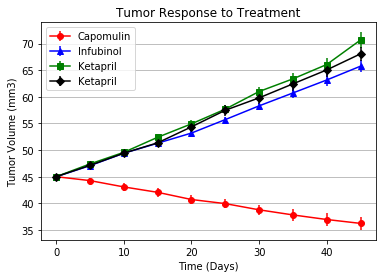

In [91]:
# Generate the Plot (with Error Bars)
Capomulin_err = mean_tumor_df.loc[mean_tumor_df["Drug"] =="Capomulin","Tumor Volume (mm3)"]
Infubinol_err = mean_tumor_df.loc[mean_tumor_df["Drug"] =="Infubinol","Tumor Volume (mm3)"]
Ketapril_err = mean_tumor_df.loc[mean_tumor_df["Drug"] =="Ketapril","Tumor Volume (mm3)"]
Placebo_err = mean_tumor_df.loc[mean_tumor_df["Drug"] =="Placebo","Tumor Volume (mm3)"]
Time =[0,5,10,15,20,25,30,35,40,45]

plt.errorbar(Time,new_table["Capomulin"],yerr=Capomulin_err,label="Capomulin",marker="o",color="r" )
plt.errorbar(Time,new_table["Infubinol"],yerr=Infubinol_err,label="Infubinol",marker="^",color="b" )
plt.errorbar(Time,new_table["Ketapril"],yerr=Ketapril_err,label="Ketapril",marker="s",color="g" )
plt.errorbar(Time,new_table["Placebo"],yerr=Placebo_err,label="Ketapril",marker="D",color="Black" )



plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="upper left")
plt.grid(axis="y")


# Save the Figure
plt.savefig("../Images/Tumor_Response.png")

In [93]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [92]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_data = full_data.groupby(["Drug","Timepoint"])
mean_met_data = met_data["Metastatic Sites"].mean()


# Convert to DataFrame
mean_met_df=pd.DataFrame(mean_met_data).reset_index()
# Preview DataFrame
mean_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [93]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_data = met_data["Metastatic Sites"].sem()

# Convert to DataFrame
sem_met_df=pd.DataFrame(sem_met_data).reset_index()

# Preview DataFrame
sem_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [94]:
# Minor Data Munging to Re-Format the Data Frames
met_table = mean_met_df.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
met_table.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


<function matplotlib.pyplot.show(*args, **kw)>

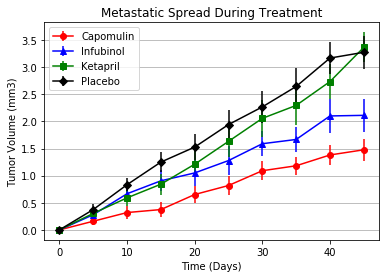

In [95]:
# Generate the Plot (with Error Bars)
Capomulin_err1 = sem_met_df.loc[sem_met_df["Drug"] =="Capomulin","Metastatic Sites"]
Infubinol_err1 = sem_met_df.loc[sem_met_df["Drug"] =="Infubinol","Metastatic Sites"]
Ketapril_err1 = sem_met_df.loc[sem_met_df["Drug"] =="Ketapril","Metastatic Sites"]
Placebo_err1 = sem_met_df.loc[sem_met_df["Drug"] =="Placebo","Metastatic Sites"]

Time=[0,5,10,15,20,25,30,35,40,45]


plt.errorbar(Time,met_table["Capomulin"],yerr=Capomulin_err1,label="Capomulin",marker="o",color="r" )
plt.errorbar(Time,met_table["Infubinol"],yerr=Infubinol_err1,label="Infubinol",marker="^",color="b" )
plt.errorbar(Time,met_table["Ketapril"],yerr=Ketapril_err1,label="Ketapril",marker="s",color="g" )
plt.errorbar(Time,met_table["Placebo"],yerr=Placebo_err1,label="Placebo",marker="D",color="Black" )

plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")
# Save the Figure
plt.savefig("../Images/Metastatic_spread_during_treatment.png")
# Show the Figure
plt.show


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [96]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_data = full_data.groupby(["Drug","Timepoint"])
mouse_count = mouse_data["Mouse ID"].nunique()

# Convert to DataFrame
mouse_count_df=pd.DataFrame(mouse_count).reset_index()

# Preview DataFrame
mouse_count_df


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [97]:
# Minor Data Munging to Re-Format the Data Frames
mung_mouse_count = mouse_count_df.pivot(index="Timepoint",columns="Drug",values="Mouse ID")


# Preview the Data Frame

mung_mouse_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


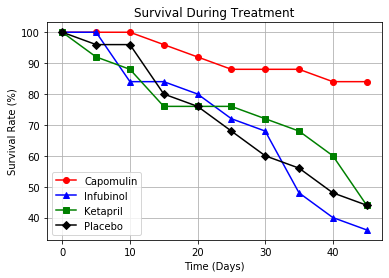

In [98]:
# Generate the Plot (Accounting for percentages)
Time = [0,5,10,15,20,25,30,35,40,45]

plt.plot(Time,(mung_mouse_count["Capomulin"]/25) *100,label="Capomulin",marker="o",color="r" )
plt.plot(Time,(mung_mouse_count["Infubinol"]/25) *100,label="Infubinol",marker="^",color="b" )
plt.plot(Time,(mung_mouse_count["Ketapril"]/25) *100,label="Ketapril",marker="s",color="g" )
plt.plot(Time,(mung_mouse_count["Placebo"]/25) *100,label="Placebo",marker="D",color="black" )
plt.grid()
plt.legend()

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")


# Save the Figure
plt.savefig("../Images/Survival_During_Treatment.png")




![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [99]:
# Calculate the percent changes for each drug
total = 45
percent_change=((new_table.loc[45,:] - total) /45)*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.481481
Ceftamin     42.478632
Infubinol    46.123457
Ketapril     57.050505
Naftisol     53.948718
Placebo      51.272727
Propriva     47.269841
Ramicane    -22.311111
Stelasyn     52.080808
Zoniferol    46.571429
Name: 45, dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

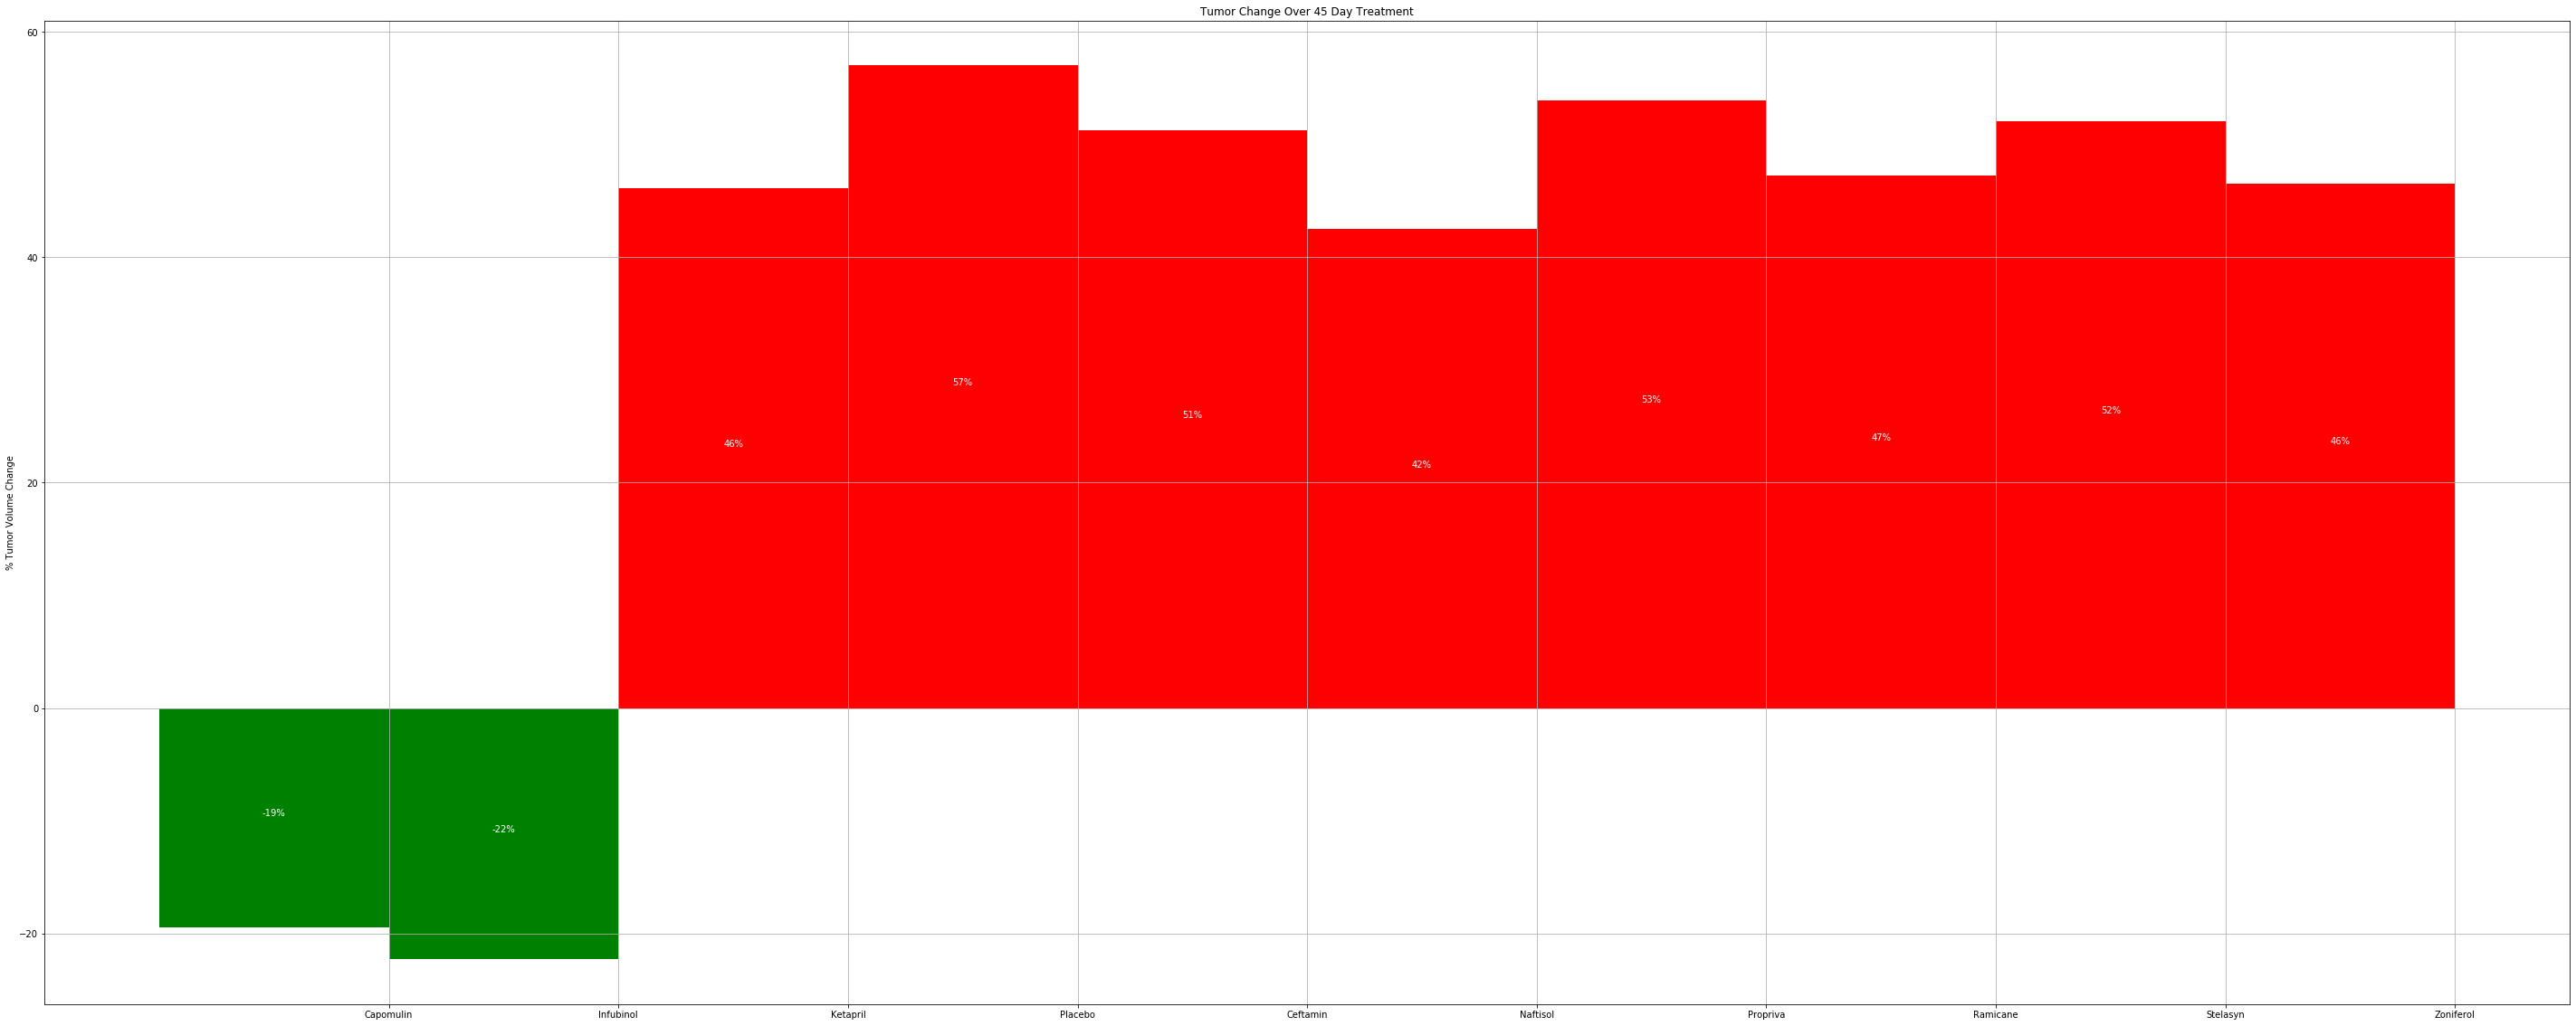

In [100]:
# Store all Relevant Percent Changes into a Tuple
per_change = tuple(zip(percent_change.index,percent_change))
# Splice the data between passing and failing drugs
pass_d=[]
fail_d = []

for x,y in per_change:
    if y < 0:
        pass_d.append(x)
    else:
        if y > 0:
            fail_d.append(x)
            
# Orient widths. Add labels, tick marks, etc. 
fig,ax=plt.subplots(figsize=(50,20))
y_value = [percent_change["Infubinol"],percent_change["Ketapril"],percent_change["Placebo"],percent_change["Ceftamin"],percent_change["Naftisol"],
          percent_change["Propriva"],percent_change["Stelasyn"],percent_change["Zoniferol"]]
z_value = [percent_change["Capomulin"],percent_change["Ramicane"]]
x_axis= [0,1]
x_axis_2=[2,3,4,5,6,7,8,9]

bars =ax.bar(x_axis,z_value,color="g",align="edge",width=-1)
bars_2=ax.bar(x_axis_2,y_value,color="r",align="edge",width= -1)
x_labels =["Capomulin","Infubinol","Ketapril","Placebo","Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.setp(ax,xticks=[0,1,2,3,4,5,6,7,8,9],xticklabels = x_labels,yticks = [-20,0,20,40,60])
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2,.5*height,"%d" %int(height)+ "%",ha="center",va="bottom",color="white")

# Call functions to implement the function calls
autolabel(bars)
autolabel(bars_2)
ax.grid()

# Save the Figure
plt.savefig("../Images/Tumor_change_over_45_day_treatment.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)